# Assignment 6.1

Name: Steve Amancha   
Date: June 13 2023  

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem 6.1.

For the Scottish hill `Races` data, a linear model can predict men’s record times from women’s record times.  
http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat


(a)  Show the scatterplot and report the prediction equation. Predict the men’s record time for the Highland Fling, for which timeW = 490.05 minutes.


Prediction equation: Men's Record Time = 4.06 + 1.14 * Women's Record Time   
Predicted men's record time for the Highland Fling: 562.12 minutes  

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

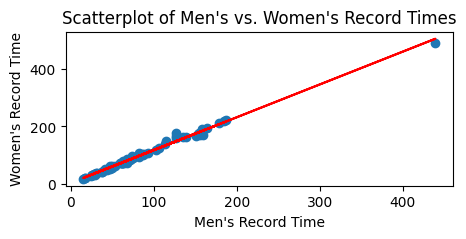

Prediction equation: Men's Record Time = -2.83 + 0.87 * Women's Record Time
Predicted men's record time for the Highland Fling: 423.94 minutes


In [127]:
# Givens and reading in data
timeW = 490.05
data_url = 'http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)

# creating scatterplot
m, b = np.polyfit(df['timeM'], df['timeW'], 1)
fig, ax1 = plt.subplots(figsize=(5,2))
plt.scatter(df['timeM'], df['timeW'])
plt.xlabel("Men's Record Time")
plt.ylabel("Women's Record Time")
plt.title("Scatterplot of Men's vs. Women's Record Times")
# create best-fit line based on slope-intercept form
plt.plot(df['timeM'], m*df['timeM']+b, color = 'red')
plt.show()

# performing linear regression model with predictor 
X = sm.add_constant(df['timeW'])
model = sm.OLS(df['timeM'], X)
results = model.fit()

# Report the prediction equation
intercept = results.params[0]
slope = results.params[1]
print("Prediction equation: Men's Record Time = {:.2f} + {:.2f} * Women's Record Time".format(intercept, slope))

# Predict the men's record time for the Highland Fling with timeW = 490.05 minutes
predicted_timeM = intercept + slope * timeW
print("Predicted men's record time for the Highland Fling: {:.2f} minutes".format(predicted_timeM))

(b) Find and interpret the correlation.

The strongest correlation observed is that between distance and timeW. Distance could be a more critical factor for determining timeW compared to climb.

In [14]:
# splitting table into only 
df2 = df.drop(['timeM','race'], axis=1)
corr = df2.corr()
display(corr)

,distance,climb,timeW
distance,1.000000,0.514471,0.955549
climb,0.514471,1.000000,0.685292
timeW,0.955549,0.685292,1.000000


(c) We could impose the natural constraint that when timeW = 0, then timeM = 0. Fit the model $E(Y_i)=\beta x_i.$ Interpret the estimated slope.

Slope = 0.85  
Men's record time is predicted to increase by 0.85 x womens time.  

In [17]:
x = df['timeW']
y = df['timeM']

# Fit the model
model = sm.OLS(y, x)
results = model.fit()

# Print out the statistics
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  timeM   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.107e+04
Date:                Sat, 17 Jun 2023   Prob (F-statistic):                    1.86e-85
Time:                        17:14:09   Log-Likelihood:                         -217.77
No. Observations:                  68   AIC:                                      437.5
Df Residuals:                      67   BIC:                                      439.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Problem 6.2.

For advanced industrialized nations, the Firearms data file at the text website shows annual homicide rates (per million population) and the number of firearms (per 100 people), with data taken from Wikipedia and [smallarmssurvey.org](smallarmssurvey.org).

(a) Construct a scatterplot and highlight any observations that fall apart from the general trend.

One observation is that there is an outlier nation with a data point where there was a higher correlation of guns to deaths. The reason the best fit line doesn't fit is because their is not a direct correlation and there is a even scatterplot without the outlier. 


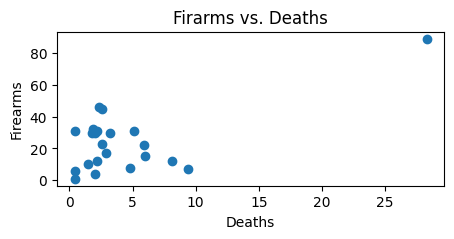

In [128]:
# Pulling in data for data frame
data_url = 'http://stat4ds.rwth-aachen.de/data/Firearms.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)
df1 = df.drop('Nation', axis=1)
# creating scatterplot

fig, ax = plt.subplots(figsize=(5,2))
plt.scatter(df['deaths'], df['firearms'])
plt.xlabel("Deaths")
plt.ylabel("Firearms")
plt.title("Firarms vs. Deaths")
plt.show()

(b) Find the correlation with and without the outlying observation. Why is it so different in the two cases?

When the outlier is present, it suggests that as the number of firearms increases, the number of deaths tends to increase as well. When the outlier is removed, however, the correlation becomes slightly negative, suggesting that an increase in firearms is slightly associated with a decrease in deaths.

In [125]:
# Correlation with outlier 
display("With the outlying observation: ",df1.corr())

# Removing outlier and calculating correlation 
df2 = df1.drop(labels=21, axis=0)
corr = df2.corr()
display("Without the outlier: ", corr)

'With the outlying observation: '

,deaths,firearms
deaths,1.000000,0.634352
firearms,0.634352,1.000000


'Without the outlier: '

,deaths,firearms
deaths,1.000000,-0.175088
firearms,-0.175088,1.000000


(c) Fit the linear regression model with and without the outlying observation, and note how influential an outlier can be on the fit.

The presence of this outlier indicates that there might be extreme situations where a large increase in firearms correlates with a significant increase in deaths. However with the removal of the outlier the overall trend appears to be that firearms and deaths are slightly inversely related.

Prediction equation with outlier: Deaths = -0.27 + 0.19 * Firearms   
Prediction equation without outlier: Deaths = 3.91 + -0.03 * Firearms   

In [126]:
# performing linear regression model with predictor 
X = sm.add_constant(df1['firearms'])
model = sm.OLS(df1['deaths'], X)
results = model.fit()

# Report the prediction equation
intercept = results.params[0]
slope = results.params[1]
print("Prediction equation with outlier: Deaths = {:.2f} + {:.2f} * Firearms".format(intercept, slope))


# performing linear regression model with predictor 
X = sm.add_constant(df2['firearms'])
model = sm.OLS(df2['deaths'], X)
results = model.fit()

# Report the prediction equation
intercept = results.params[0]
slope = results.params[1]
print("Prediction equation without outlier: Deaths = {:.2f} + {:.2f} * Firearms".format(intercept, slope))

Prediction equation with outlier: Deaths = -0.27 + 0.19 * Firearms
Prediction equation without outlier: Deaths = 3.91 + -0.03 * Firearms


## Problem 6.5.

For the `Covid19` data file at the text website:  
http://stat4ds.rwth-aachen.de/data/Covid19.dat 

(a) Construct the two scatterplots shown in Figure 6.3.

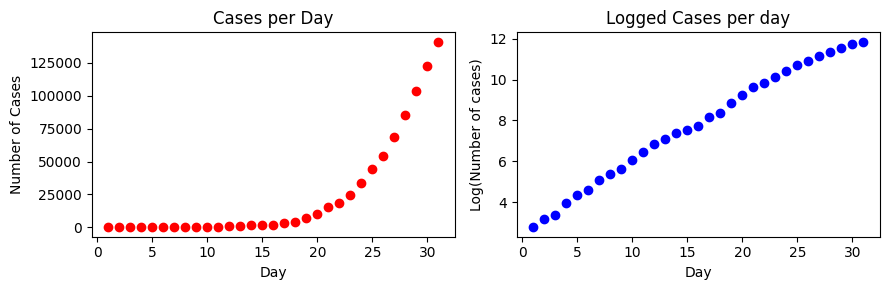

In [132]:
# Pulling in data for data frame
data_url = 'http://stat4ds.rwth-aachen.de/data/Covid19.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)

# Creating log cases
df['log_cases'] = np.log(df['cases'])

# Creating and labeling of 2 plots one normal and the other log(cases)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,3))
ax1.scatter(df['day'], df['cases'], color='red')
ax1.set_title("Cases per Day")
ax1.set_xlabel("Day")
ax1.set_ylabel("Number of Cases")

ax2.scatter(df['day'], df['log_cases'], color='blue')
plt.xlabel("Day")
plt.ylabel("Log(Number of cases)")
plt.title("Logged Cases per day")
plt.tight_layout()
plt.show()


(b) Find and interpret the correlation between time and (i) cases, (ii) log(cases).

There is a stronger correlation with the log_cases than with the normal 'cases' which leads me to believe a logarhitmic relationship would better represent day and cases. The rate of increase seems to be accelerating, which a log transformation better captures. 

In [121]:
df1 = df.drop(['log_cases'], axis=1)
df2 = df.drop(['cases'], axis=1)
display("Correlation between time and cases : ",df1.corr())
display("Correlation between time and log cases: ", df2.corr())

'Correlation between time and cases : '

,day,cases
day,1.000000,0.793737
cases,0.793737,1.000000


'Correlation between time and log cases: '

,day,log_cases
day,1.000000,0.996821
log_cases,0.996821,1.000000


(c)  Fit the linear model for the log-transformed counts and report the prediction equation.$^{29}.$ Explain why the predicted count at day $x+1$ equals the predicted count at day $x$ multiplied by $\text{exp}(\hat\beta_1)=1.36.$

Prediction equation: Log(cases) = 2.84 + 0.31 * day  

When you take the exponetial of the predicted equation you can simplify the equation and the ratio of the predicted counts between day x+1 and day x is equivalent to exp(β1) = 1.36.    

In [81]:
# adds constant to the model
X = df['day']
X = sm.add_constant(X) 
y = df['log_cases']

# performing linear regression model with constant 
model = sm.OLS(y, X)
results = model.fit()

# Report the prediction equation
intercept = results.params[0]
slope = results.params[1]
print("Prediction equation: Log(cases) = {:.2f} + {:.2f} * day".format(intercept, slope))

# Make predictions for day x and day x+1
x = 12  # Example day
y_x = np.exp(intercept + slope * x)
y_x2 = np.exp(intercept + slope * (x + 1))

# Calculate the ratio of y_x_plus_1 to y_x
ratio = y_x2 / y_x
print(f"Ratio: {ratio:.2f}")

Prediction equation: Log(cases) = 2.84 + 0.31 * day
Ratio: 1.36


## Problem 6.7.

For the model permitting interaction between distance and climb in their effect on women’s record times for the Scottish hill races, analyze whether any observation is influential in the least squares fit. How does the parameter estimate for the interaction term change when you analyze the data without it?

Index 41 is a clear outlier and highly influential based on the initial scatterplot so that was the row removed. We later confirmed using cook's distance of 7.88 that this was an outlier. After removing row 41 from the dataset, the estimate of the interaction parameter changes from the substantively important effect of 0.658 (P-value=0.100) to the unimportant effect of -0.033 (highly non-significant with P-value=0.933).

In [115]:
data_url = 'http://stat4ds.rwth-aachen.de/data/ScotsRaces.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)
# cleaning datasets and creating interaction
df = df.drop(['race', 'timeM'], axis=1)
X = df[['distance', 'climb']]
X['distance:climb'] = df['distance'] * df['climb']
X = sm.add_constant(X)
y = df['timeW']

# Analysis With data outlier
model = sm.OLS(y, X)
results = model.fit()
# Perform influence analysis
print(results.summary())

# Observing Cook's d values /  I was able to confirm the outlier
influence = results.get_influence()
summary_table = influence.summary_table()
# print(summary_table)

# Without outlier and adding interaction 
y_wo = y.drop(labels=40)
X1 = X
X1 = X1.drop(labels=40) 
model = sm.OLS(y_wo, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  timeW   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     598.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           9.45e-47
Time:                        14:40:13   Log-Likelihood:                -272.79
No. Observations:                  68   AIC:                             553.6
Df Residuals:                      64   BIC:                             562.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.0162      6.683     -0.

## Problem 6.8.

Refer to the example in Section 6.2.5 of the crime rate in Florida counties.

(a) Explain what it means when we say these data exhibit *Simpson’s paradox*. What could cause this change in the direction of the association between crime rate and education
when we adjust for urbanization?

According to the Figure 6.5, forida counties shows how a positive association between crime rate and education can change to negative when we adjust and ignore urbanization. This phenomenon of association reversal between marginal and conditional associations is called Simpson's paradox.

(b) Using the Florida data file, construct the scatterplot between *x* = education (HS) and *y* = income (Income), for which the correlation is 0.79. If we had data at the individual
level as well as aggregated for a county, sketch a scatterplot to show that at that level the correlation could be much weaker. So, predictions about individuals based on the
behavior of aggregate groups, known as the *ecological fallacy*, can be quite misleading.

Correlation calculated:  0.79


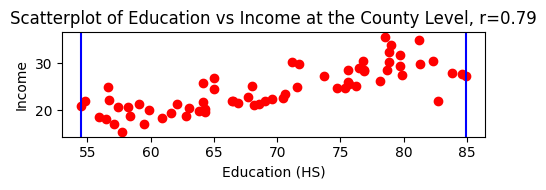

In [133]:
# reading data and define givens
data_url = 'http://stat4ds.rwth-aachen.de/data/Florida.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
fdf = pd.DataFrame(data)
X = fdf['HS']
y = fdf['Income']
corr = 0.79
# calc correlation
corr = round(np.corrcoef(X, y)[0,1],2)
print("Correlation calculated: ", corr)

# scatterplot 
fig, ax1 = plt.subplots(figsize=(5,2))
ax1.scatter(X, y, color='red')
ax1.set_title(f"Scatterplot of Education vs Income at the County Level, r={corr}")
ax1.set_xlabel("Education (HS)")
ax1.axvline(x = 54.5, color = 'b', label = 'axvline - bottom range')
ax1.axvline(x = 84.9, color = 'b', label = 'axvline - top range')

ax1.set_ylabel("Income")
plt.tight_layout()
plt.show()


(c) Refer to (b), in which *x* falls between 54.5 and 84.9. Is it sensible to use the least squares line to predict a county’s median income if *x* = 0? Sketch a hypothetical true relationship between *x* and *E(Y)* to show the danger of *extrapolation*, using a fitted line to predict *E(Y)* far from the observed *x* values.

Since all graduation falls are greater than 50. Using a least square line to predict Income when education is equal to 0 would be extrapolation.



Intercept -4.604318625951411, Coef: [0.41898049], R-squared: 0.628248766082176


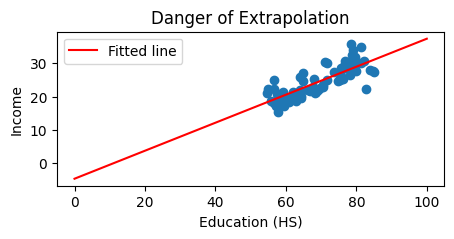

In [134]:
x = X.values.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)
print(f"Intercept {model.intercept_}, Coef: {model.coef_}, R-squared: {model.score(x, y)}")

# Generate x values for prediction and plot fitted line
x_fit = np.linspace(0, 100, 400).reshape(-1, 1)
y_fit = model.predict(x_fit)

fig, ax = plt.subplots(figsize=(5,2))
plt.scatter(x, y)
plt.plot(x_fit, y_fit, color='red', label='Fitted line')
plt.xlabel('Education (HS)')
plt.ylabel('Income')
plt.title('Danger of Extrapolation')
plt.legend()
plt.show()

## Problem 6.10.

The `Students` data file shows responses on variables summarized in Exercise 1.2.

(a) Fit the linear model using *hsgpa* = high school GPA, *tv* = weekly hours watching TV, and *sport* = weekly hours participating in sports as predictors of *cogpa* = college GPA. Report the prediction equation. What do the *P*-values suggest?

Assuming 0.05 as significant, the p values tell me that the hspga is a significant predictor of cogpa, where as the other indedpendent variables are not.  
Prediction equation : cogpa = 2.82 + .21(hsgpa) + 0(tv) - 0.01(sport)

In [90]:
# reading data and define givens
data_url = 'http://stat4ds.rwth-aachen.de/data/Students.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)

# Creating parameters needed
x = df[['hsgpa','tv','sport']]
y = df[['cogpa']]

# Fitting the linear model 
model = LinearRegression()
model.fit(x, y)

# print("Prediction equation: Log(cases) = {:.2f} + {:.2f} * day".format(intercept, slope))
print(f"Intercept {model.intercept_}, Coef: {model.coef_}, R-squared: {model.score(x, y)} ")

Intercept [2.81542733], Coef: [[ 0.20880392  0.00333565 -0.01406554]], R-squared: 0.10451831451756532 


In [91]:
# Fit a linear model part 2 for confirmation
X = df[['hsgpa', 'tv', 'sport']]
X = sm.add_constant(X) # adding a constant
y = df['cogpa']
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     2.179
Date:                Mon, 19 Jun 2023   Prob (F-statistic):              0.101
Time:                        13:59:23   Log-Likelihood:                -18.587
No. Observations:                  60   AIC:                             45.17
Df Residuals:                      56   BIC:                             53.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8154      0.368      7.655      0.0

(b)  Summarize the estimated effect of *hsgpa.*

My analysis of the hsgpa of 0.2088 shows me that there is a slight positive correlation between highschool gpa and college gpa. Overall having a good hsgpa will predict you will have better a cogpa. 

(c) Report and interpret $R^2$, adjusted $R^2$, and the multiple correlation.

R-squared; 0.105   | Adj. R-squared: 0.057  | Coef: [[ 0.20880392  0.00333565 -0.01406554]]

A low R-sqaured value indicates that the model does not fit the data well, only about 10.5% reflects on the variance in the cogpa. 
Adj R-squared is lower than the R-squared, suggesting that some of the predictors may not be adding much value to the model. Adj R-squared is normally more accurate than the R-squared value. 
The multiple correlation coeficients to me tells me that those are weights on each of the independent variables. 


## Problem 6.11.

Refer to the model fitted in the previous exercise to predict college GPA.

(a) Test $H_0:\beta_1 = \beta_2 = \beta_3 =0.$ Report the *P*-value and interpret.


P-values : hsgpa = 0.044 | tv = 0.629 | sport = 0.230   
By multiplying the independent variables by zero you still have a constant, which lets us reject the null hypothesis.

If the p-value is less than 0.05, you can reject the null hypothesis and conclude that at least one of the predictor variables is statistically significantly related to the outcome variable. In this case hsgpa is lower than 0.05 and we can reject the null hypothesis. 


(b) Show how to conduct a significance test about the individual effect of hsgpa, adjusting for tv and sport, using $\alpha = 0.05$. Interpret.

From the summary table above, df = 56 and the P-value = 0.044 for hsgpa  
Reject H0 (hsgpa has a positive effect on cogpa, adjusting for tv and sport)

(c)  Is the effect in (b) significant at the $\alpha = 0.05$ level if we use the Bonferroni approach to test the family of three individual effects? Explain.

The Bonferroni approach we need P-value ≤ 0.017 to reject H0. So the hsgpa effect is not significant with this new correction. 

In [87]:
alpahcBon = 0.05 / 3
print(f"adjusted signficiance level p value: {alpahcBon:.3f}") 

adjusted signficiance level p value: 0.017


(d) Are the effects of *tv* and *sport* significant? Propose an alternative model.

From previous testing, we conclude that, among these variables, only hsgpa has a significant effect on the mean college GPA.    
The newly proposed model would be : cogpa = 2.75 + (.213 * hsgps)

In [19]:
X = df[['hsgpa']]
X = sm.add_constant(X) # adding a constant
y = df['cogpa']
model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  cogpa   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.871
Date:                Sun, 18 Jun 2023   Prob (F-statistic):             0.0313
Time:                        16:20:26   Log-Likelihood:                -19.479
No. Observations:                  60   AIC:                             42.96
Df Residuals:                      58   BIC:                             47.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7492      0.322      8.536      0.0

## Problem 6.12.

For the `UN` data file at the book’s website (see Exercise 1.24), construct a multiple regression model predicting Internet using all the other variables. Use the concept of multicollinearity to explain why adjusted $R^2$ is not dramatically greater than when GDP is the sole predictor. Compare the estimated GDP effect in the bivariate model and the multiple regression model and explain why it is so much weaker in the multiple regression model.

R^2 score (all other features):  0.59   
R^2 score (only GDP feature):  0.69  

Because of multicollinearity, if other variables in the model are correlated with GDP, they could be absorbing some of the explanatory power of GDP, causing its coefficient to be smaller in the multiple regression model. I was able to see that GDP also had a variance inflation factor above 7.3, indicating that multicollinearity is a problem.

R^2 score:  0.5927304763116514


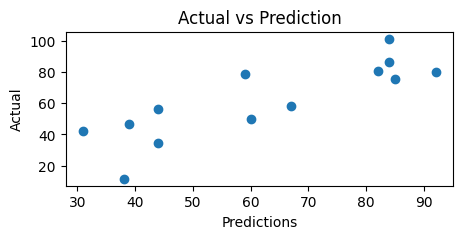

   VIF Factor   features
0  569.419104      const
1    7.344154        GDP
2   10.839134        HDI
3    7.157718        GII
4    2.192998  Fertility
5    2.589220        CO2
6    1.471826   Homicide
7    1.924542     Prison


In [84]:
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
# reading data and define givens
data_url = 'http://stat4ds.rwth-aachen.de/data/UN.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)
df = df.drop('Nation', axis=1)
x = df.loc[:, df.columns != 'Internet']
x = sm.add_constant(x)
y = df['Internet']

# splitting data into test and training set and running linear regression model 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=22)
sk_model = LinearRegression()
sk_model.fit(x_train, y_train)

# created columns and coefficients df
coef = pd.DataFrame(sk_model.coef_, columns=['Coefficients'])
cols = pd.DataFrame(x.columns, columns=['Columns'])
joined = pd.concat([cols['Columns'], coef['Coefficients']], axis=1)

# making predictions based off of model
y_pred_test = sk_model.predict(x_test)
print("R^2 score: ", r2_score(y_test, y_pred_test))

# Plotting scatter plot
fig, ax1 = plt.subplots(figsize=(5,2))
plt.scatter(y_test, y_pred_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Actual vs Prediction')
plt.show()

# finding variance inflation factors and mapping to features
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
print(vif)

In [86]:
# limiting to only one feature for comparison
x = df['GDP']
x = sm.add_constant(x)
y = df['Internet']

# splitting data into test and training set and running linear regression model 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=22)
sk_model = LinearRegression()
sk_model.fit(x_train, y_train)

# Predicting with test x values 
y_pred_test = sk_model.predict(x_test)
print("R^2 score: ", r2_score(y_test, y_pred_test))

R^2 score:  0.6885604524434678


## Problem 6.13.

For the `Polid` data file summarized in Table 5.2, conduct an ANOVA to analyze whether mean political ideology varies by race. Use a follow-up multiple comparison method with overall
confidence level 0.95 to estimate differences of means between pairs of races on political ideology. Interpret results.

From the ANOVA table, the F statistic and associated p-value will tell you if there is a significant difference in the means of political ideology across the different races. With a p-value is less than 0.0001 we can reject the null hypothesis and conclude that there is a significant difference.

The turkey multiple companison method shows that Hispanics and Whites tend to be more conservative than Blacks, on the average, but there is no significant difference between Whites and Hispanics.

In [83]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# read data
data_url = 'http://stat4ds.rwth-aachen.de/data/Polid.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)

# fit model with the data
model = ols('ideology ~ C(race)', data=df).fit()

# perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(df['ideology'], df['race'], alpha=0.05)
print(m_comp)

               sum_sq      df         F    PR(>F)
C(race)     38.790728     2.0  9.620635  0.000069
Residual  5185.196068  2572.0       NaN       NaN
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
   black hispanic   0.2727 0.0245  0.0279 0.5175   True
   black    white   0.3539    0.0  0.1643 0.5434   True
hispanic    white   0.0811 0.5759 -0.1088 0.2711  False
-------------------------------------------------------


## Problem 7.1.

For the `Houses` data file described in Section 7.1.3, consider $Y$ = selling price, $x_1$ = tax bill (in dollars), and $x_2$ = whether the house is new.

(a) Form the scatterplot of $y$ and $x_1$. Does the normal GLM structure of constant variability in $y$ seem approproate? If not, how does it seem to be violated?

Prices seem to vary more when there are higher taxes. Variability in Y could be greater when its mean is higher, at higher tax dollars, violating the ordinary linear model assumption of constant variability in Y. We could instead assume that the conditional distribution of Y is the gamma distribution.

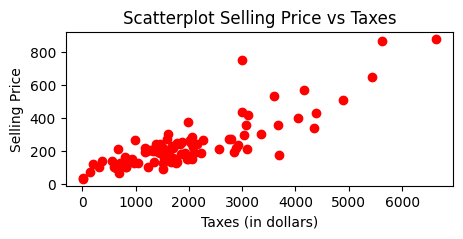

In [135]:
# read data
data_url = 'http://stat4ds.rwth-aachen.de/data/Houses.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)
y = df[['price']]
x1 = df['taxes']
x2 = df['new']

# creating scatterplot of selling price vs taxes
fig, ax1 = plt.subplots(figsize=(5,2))
ax1.scatter(x1, y, color='red')
ax1.set_title("Scatterplot Selling Price vs Taxes")
ax1.set_xlabel("Taxes (in dollars)")
ax1.set_ylabel("Selling Price")
plt.show()

(b) Using the identity link function, fit the (i) normal GLM, (ii) gamma GLM. For each model, interpret the effect of $x_2$.

Based on the coefficients, the estimated mean price for new homes is 86.2 thousand dollars, higher than for older homes with the Gaussian model compared to the gamma model. The effect of x2 is that it brings the median closer to the true real value, accounting for outliers. 

In [136]:
exog = df[['taxes', 'new']]

# Instantiate a Gaussian family model with the default link function.
glm_gaus = sm.GLM(y, sm.add_constant(exog), family=sm.families.Gaussian())
res_gaus = glm_gaus.fit()
print(res_gaus.summary())
print("Confidence interval: \n", res_gaus.conf_int())

# Instantiate a gamma family model with the default link function.
glm_gamma = sm.GLM(y, sm.add_constant(exog), family=sm.families.Gamma(link=sm.genmod.families.links.identity()))
res_gamma = glm_gamma.fit()
print(res_gamma.summary())
print("Confidence Interval: \n", res_gamma.conf_int())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:               Identity   Scale:                          6212.7
Method:                          IRLS   Log-Likelihood:                -577.09
Date:                Mon, 19 Jun 2023   Deviance:                   6.0264e+05
Time:                        14:57:30   Pearson chi2:                 6.03e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9333
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.9651     14.695      2.856      0.0

/usr/local/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


(c) For each model, describe how the estimated variability in selling prices varies as the mean selling price varies from 100 thousand to 500 thousand dollars.

In [137]:
# Generate the range from 100 to 500 (inclusive) in steps of 100
mean_selling_prices = np.arange(100, 501, 100)  

# Creating mean values and a new data frame with all the means matching with varying selling prices
mean_df = pd.DataFrame({'new': np.mean(df['new']), 'taxes': np.mean(df['taxes'])}, index=[0])
mean_df_new = pd.DataFrame(np.repeat(mean_df.values, 5, axis=0))
mean_df_new.columns = mean_df.columns
mean_df_new['price'] = mean_selling_prices

# Creating preditions using previous gaus and gamma models. 
pred_gaus = res_gaus.get_prediction(mean_df_new)
display("Estimated at for range of 100 - 500 mean selling price using Gaussian model : ", pred_gaus.summary_frame())
display("variance of the prediction means: ", pred_gaus.var_pred_mean)
print()
pred_gamma = res_gamma.get_prediction(mean_df_new)
display("Estimated at for range of 100 - 500 mean selling price using Gamma model : ", pred_gamma.summary_frame())
display("variance of the prediction means: ", pred_gamma.var_pred_mean)

'Estimated at for range of 100 - 500 mean selling price using Gaussian model : '

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,8806.173255,2719.688315,3475.682108,14136.664402
1,17426.180995,5444.158144,6755.827107,28096.534883
2,26046.188735,8168.635293,10035.957757,42056.419713
3,34666.196475,10893.114271,13316.084825,56016.308126
4,43286.204216,13617.593979,16596.210461,69976.197970


'variance of the prediction means: '

array([7.39670453e+06, 2.96388579e+07, 6.67266026e+07, 1.18659939e+08,
       1.85438866e+08])

'Estimated at for range of 100 - 500 mean selling price using Gamma model : '

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,8221.160450,3593.704807,1177.628457,15264.692444
1,16275.848202,7190.827997,2182.084309,30369.612094
2,24330.535953,10787.956460,3186.529824,45474.542082
3,32385.223704,14385.086241,4190.972757,60579.474651
4,40439.911455,17982.216549,5195.414657,75684.408253


'variance of the prediction means: '

array([1.29147142e+07, 5.17080073e+07, 1.16380005e+08, 2.06930706e+08,
       3.23360112e+08])

(d) Which model is preferred according to AIC?

For modeling house selling prices, AIC = 1160 for the normal GLM and AIC = 1104 for the gamma GLM. These indicate a clear preference for the gamma GLM.  
The smaller AIC is the preferred criteria for AIC determination. 

In [30]:
display(res_gaus.aic)
display(res_gamma.aic)

1160.1775330616279

1104.7236601725817

## Problem 7.5.

A study of sheep mentioned in Exercise 1.27 analyzed whether the sheep survived for a year from the original observation time (1 = yes, 0 = no) as a function of their weight (*kg*) at the original observation.

(a) Does the survival of the sheep seem to depend on their weight? If so, how does the weight of a sheep affect its probability of survival? Answer by fitting a generalized linear model for the survival probability.

 A positive weight coefficient suggests that as the weight of a sheep increases, the log-odds of survival also increase.

In [42]:
# read data
data_url = 'http://stat4ds.rwth-aachen.de/data/Sheep.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
df = pd.DataFrame(data)
y = df['survival']
x = df['weight']
X = sm.add_constant(x)

# Fit the logistic regression model
glm_bi = sm.GLM(y, X, family=sm.families.Binomial())
res_bi = glm_bi.fit()
print(res_bi.summary())
print("Confidence interval: \n", res_bi.conf_int())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survival   No. Observations:                 1359
Model:                            GLM   Df Residuals:                     1357
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -645.22
Date:                Mon, 19 Jun 2023   Deviance:                       1290.4
Time:                        12:47:41   Pearson chi2:                 1.44e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1294
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0298      0.251     -8.103      0.0

(b)  For what weight values do the sheep have more than a 50% chance of survival?

For that sheep that have a weight between  11.6 - 34.2kg, they have more than a 50% survival rate. 


In [56]:
# Predict the probability of survival for the weight values
predicted_probs = res_bi.predict(X)
# Filter the weight values where the predicted probability is greater than 0.5
weight_values_above_50 = X[predicted_probs > 0.5]

# Print the weight values with more than a 50% chance of survival
print("Weight values with more than a 50% chance of survival:")
print(weight_values_above_50.head()) 
print("For sheep that have a weight between these values have more than a 50% survival rate \n",
      min(weight_values_above_50['weight']), max(weight_values_above_50['weight']))

Weight values with more than a 50% chance of survival:
   const  weight
0    1.0    20.8
1    1.0    23.0
2    1.0    28.0
3    1.0    27.5
4    1.0    26.0
For sheep that have a weight between these values have more than a 50% survival rate 
 11.6 34.2


## Problem 7.9.

The `SoreThroat` data file at the book’s website contains data from from a study$^{23}$ about *Y* = whether a patient having surgery had a sore throat on waking (1 = yes, 0 = no) as a function of *D* = duration of the surgery (in minutes) and *T* = type of device used to secure the airway (1 = tracheal tube, 0 = laryngeal mask airway).

(a) Fit a GLM using both explanatory variables as main effects. Interpret effects.

Using the model constants the formula formed is logit(y) = -1.42 + 0.07D - 1.66T, you can use the exponential of the coefficient of T to determine the estimated odds that the tracheal was better than using a laryngeal mask airway, for a given duration of surgery. In this case, the tracheal device was 0.19 times more likely to cause a sore throat. The effect of the duration seems to be small. If anything the longer the duration of the surgery, the more likely the estimate of a sore throat could happen.

In [77]:
# read data and making need DF's 
data_url = 'http://stat4ds.rwth-aachen.de/data/SoreThroat.dat'
data = pd.read_csv(data_url, delim_whitespace=True)
y = df['Y']
x1 = df['D']
x2 = df['T']
X = df[['D','T']]
X = sm.add_constant(X)

# Fit the logistic regression model
glm_bi = sm.GLM(y, X, family=sm.families.Binomial())
res_bi = glm_bi.fit()
print(res_bi.summary())
print(np.exp(-1.66))
print(np.exp(0.07))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       32
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15.069
Date:                Mon, 19 Jun 2023   Deviance:                       30.138
Time:                        13:40:23   Pearson chi2:                     37.0
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4173      1.095     -1.295      0.1

(b) Fit a GLM permitting interaction between the explanatory variables. Interpret the effect of *D* at each category of *T*.

When T = 0, the equation turns to -> logit(y) = 0.05 + 0.03D   
When T = 1, the equation turns to -> logit(y) = - 4.42 + 0.075D   
From these two questions the effect of D is not very significant on whether a patient woke up with a sore throat. 

In [76]:
# Creating 
interaction = df['D'] * df['T']
X['interaction'] = interaction

# Fit the logistic regression model with interaction
glm_interaction = sm.GLM(y, X, family=sm.families.Binomial())
res_interaction = glm_interaction.fit()

# Print the model summary
print(res_interaction.summary())

,const,D,T,interaction
0,1.0,45,0,0
1,1.0,15,0,0
2,1.0,40,0,0
3,1.0,83,1,83
4,1.0,90,1,90


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                   35
Model:                            GLM   Df Residuals:                       31
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.161
Date:                Mon, 19 Jun 2023   Deviance:                       28.321
Time:                        13:38:40   Pearson chi2:                     28.6
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3997
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0498      1.469      0.034      

&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;
&nbsp;


----------------
$^{23}$ Described in “Binary Data” by D. Collett, *Encyclopedia of Biostatistics*, 2nd ed. (Wiley, 2005), pp. 439–446.

$^{29}$ Some lack of fit the last few days reflects the impact of increasing “social distancing.”